In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', 200)

# 1- sample t-test

In [1]:
import numpy as np
from scipy import stats

# Sample data
test_scores = np.array([72, 78, 74, 80, 76, 79, 71, 77, 73, 75])

# Sample statistics
sample_mean = np.mean(test_scores)
sample_std = np.std(test_scores, ddof=1)  # ddof=1 for sample standard deviation
n = len(test_scores)
mu0 = 75  # Hypothesized population mean

# t-test calculation
t_statistic, p_value = stats.ttest_1samp(test_scores, mu0)

# Output results
print(f"Sample Mean: {sample_mean:.2f}")
print(f"t-Statistic: {t_statistic:.2f}")
print(f"P-value: {p_value:.4f}")

# Decision
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: The average score is significantly different from 75.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference from 75.")


Sample Mean: 75.50
t-Statistic: 0.52
P-value: 0.6141
Fail to reject the null hypothesis: There is no significant difference from 75.


In [4]:
from scipy.stats import t

# Set the t-value and degrees of freedom
t_value = -1.25
df = 58  # Replace this with your specific degrees of freedom

# Calculate the CDF value
cdf_value = t.cdf(t_value, df)
print(cdf_value*2)

0.21631974483731498


In [5]:
from scipy import stats

sample = [172, 173, 170, 171, 175, 169, 168, 171, 174, 172, 170, 173, 169, 168, 175]
pop_mean = 170

t_stat, p_value = stats.ttest_1samp(sample, pop_mean)
print("t-statistic:", t_stat)
print("p-value:", p_value)


t-statistic: 2.1971768720102216
p-value: 0.045339544447787296



## Calculate normality

In [6]:
from scipy.stats import shapiro
sample = [172, 173, 170, 171, 175, 169, 168, 171, 174, 172, 170, 173, 169, 168, 175]
shapiro(sample)

# If the p-value is greater than your chosen significance level (α = 0.05), 
# # you can assume the data comes from a normally distributed population. 

# If the p-value is less than or equal to the significance level, the normality assumption is not met, 
# and you should consider applying a data transformation or using a non-parametric test like the Mann-Whitney U test

ShapiroResult(statistic=0.9439239864192895, pvalue=0.43427816254063606)

<Axes: ylabel='Density'>

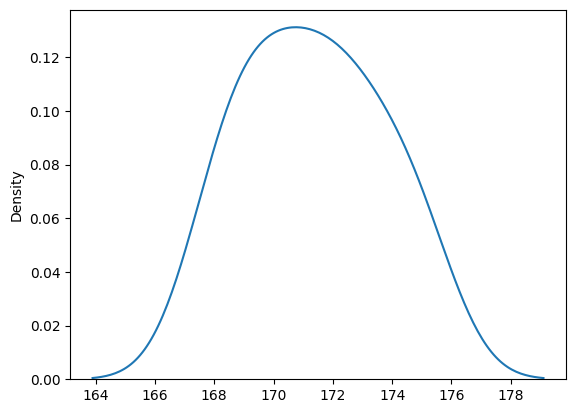

In [13]:
sns.kdeplot(sample)

# Independent 2 sample t-test

In [14]:
import numpy as np
from scipy import stats

# Generate random samples for two independent groups
np.random.seed(42)
group1 = np.random.normal(loc=170, scale=5, size=30)  # Mean=170, Std=5, n=30
group2 = np.random.normal(loc=175, scale=6, size=35)  # Mean=175, Std=6, n=35

# Perform an independent t-test
t_stat, p_value = stats.ttest_ind(group1, group2, equal_var=True)  # Assuming equal variances

# Output results
print("t-statistic:", t_stat)
print("p-value:", p_value)

# Check significance at α = 0.05
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: The means are significantly different.")
else:
    print("Fail to reject the null hypothesis: No significant difference in means.")


t-statistic: -3.943177666481369
p-value: 0.00020453756573145986
Reject the null hypothesis: The means are significantly different.


In [15]:
desktop_users = [12, 15, 18, 16, 20, 17, 14, 22, 19, 21, 23, 18, 25, 17, 16, 24, 20, 19, 22, 18, 15, 14, 23, 16, 12, 21, 19, 17, 20, 14]
mobile_users = [10, 12, 14, 13, 16, 15, 11, 17, 14, 16, 18, 14, 20, 15, 14, 19, 16, 15, 17, 14, 12, 11, 18, 15, 10, 16, 15, 13, 16, 11]

# Perform the Shapiro-Wilk test for both desktop and mobile users
shapiro_desktop = shapiro(desktop_users)
shapiro_mobile = shapiro(mobile_users)

print("Shapiro-Wilk test for desktop users:", shapiro_desktop)
print("Shapiro-Wilk test for mobile users:", shapiro_mobile)

Shapiro-Wilk test for desktop users: ShapiroResult(statistic=0.9783115512411942, pvalue=0.7791003299808725)
Shapiro-Wilk test for mobile users: ShapiroResult(statistic=0.9714355768676655, pvalue=0.5791606602037616)


In [17]:
# Perform Levene's test

from scipy.stats import levene

levene_test = levene(desktop_users, mobile_users)
print(levene_test)

LeveneResult(statistic=2.94395488191752, pvalue=0.09153720526741756)


In [20]:
t_stat, p_value = stats.ttest_ind(desktop_users, mobile_users)
print("t-statistic:", t_stat)
print  ("p-value:", p_value)

t-statistic: 4.625335930681123
p-value: 2.1422811334975257e-05


# Paired t-Test

In [1]:
import numpy as np
from scipy import stats

# Sample data: Before and After scores of the same individuals
before = np.array([72, 75, 78, 79, 80, 82, 85, 88, 90, 91])
after  = np.array([74, 76, 76, 80, 82, 81, 86, 89, 92, 93])

# Perform a paired t-test
t_stat, p_value = stats.ttest_rel(before, after)

# Output results
print(f"t-statistic: {t_stat:.4f}")
print(f"p-value: {p_value:.4f}")

# Decision at α = 0.05
alpha = 0.05
if p_value < alpha:
    print("Reject H₀: There is a significant difference between before and after.")
else:
    print("Fail to reject H₀: No significant difference.")

t-statistic: -2.0769
p-value: 0.0676
Fail to reject H₀: No significant difference.
